In [1]:
from active_clustering_util import *

In [2]:
filename = 'filtered_3way_after_80%.xes'
log, variants_count = read_xes(filename)
GL = add_frequency_into_variants_count(variants_count)
VARIANT = []
for gl in GL: 
    VARIANT.append(gl['variant'])

length of trace 2534 
length of event 13589


In [3]:
w = 1  #window size
tf = 1 #target fitness
nb_clus = 4 #number of cluster
N = 1 #case separate 
mcs = 0.25

****************************************************************************************************
START OF No. 0 CLUSTERING
Clustering() is called. mcs:0.25, tf:1, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:26 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 Create Purchase Order Item,Vendor creates invoice,Record Goods Receipt,Record In...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 25 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	Create Purchase Order Item,Record Goods Receipt,Vendor creat... with dist 0.0

 * Fitness check to be done 


 * CASE of fit 0.9978772135634886 < 1 tf -> fitness dropped than the tf
	 - CASE of |C| 6 >= 5.0 mcs * |R| -> look_ahead is called, then this clustering is completed

 * Look_ahead()
	 = 0 dpi(s) checked
	 = 10 dpi(s) checked

 * Clustering completed
		Create Purchase Order Item,Vendor creates invoice,Record Goods Receipt,Record Invoice Receipt,Clear Invoice
		Create Purchase Order Item,Record Goods Receipt,Vendor creates invoice,Record Invoice Receipt,Clear Invoice
		Create Purchase Order Item,Vendor creates invoice,Record Goods Receipt,Record Invoice Receipt,Remove Payment Block,Clear Invoice
		Create Purchase Order Item,Delete Purchase Order Item
		Create Purchase Order Item,Record Goods Receipt,Vendor creates invoice,Record Invoice Receipt,Remove Payment Block,Clear Invoice
		Create Purchase Requisition Item,Create Purchase Order Item,Vendor creates invoice,Record Goods Receipt,Record Invoice Receipt,Clear Invoice


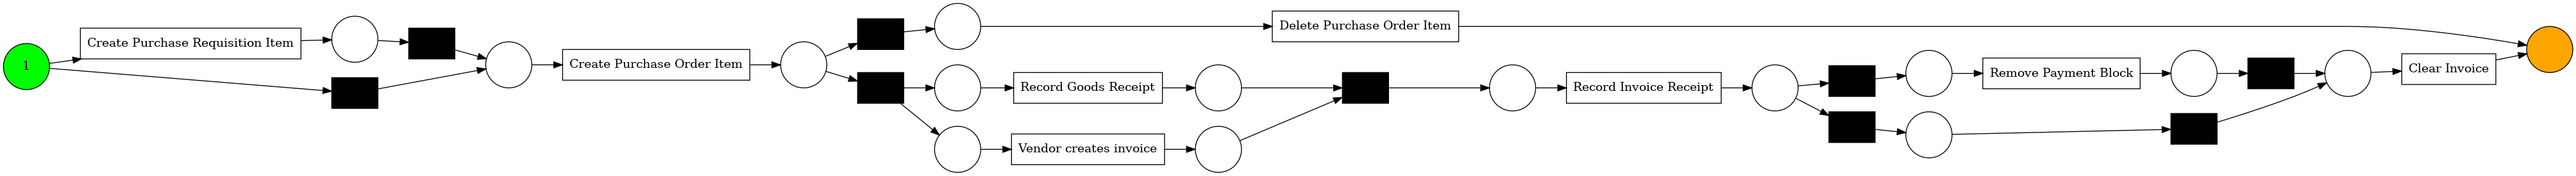

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 1 CLUSTERING
Clustering() is called. mcs:0.25, tf:1, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:20 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 Create Purchase Order Item,Record Goods Receipt,Record Service Entry Sheet,Vendo...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 19 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	Create Purchase Order Item,Change Price,Vendor creates invoi... with dist 0

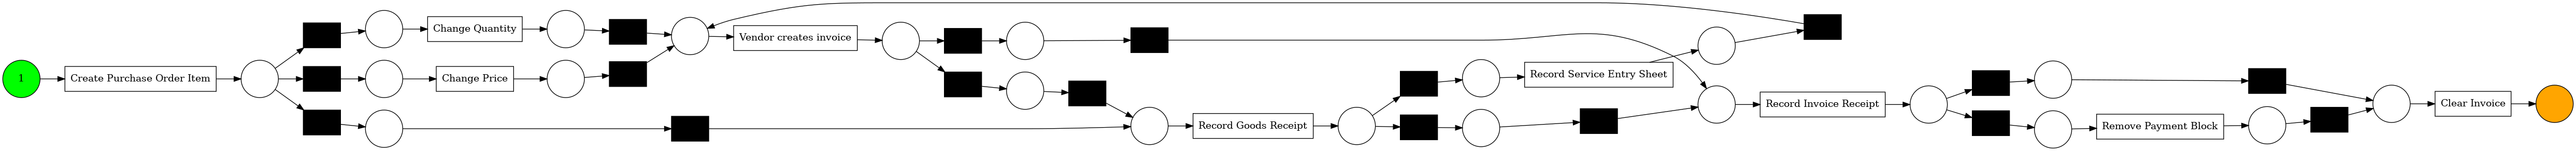

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 2 CLUSTERING
Clustering() is called. mcs:0.25, tf:1, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:15 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 Create Purchase Order Item,Change Quantity,Record Goods Receipt,Vendor creates i...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 14 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	Create Purchase Order Item,Change Price,Record Goods Receipt... with dist 0

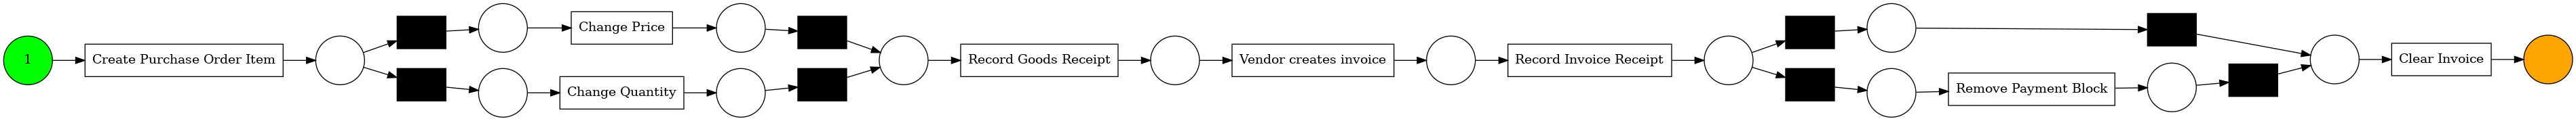

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 3 CLUSTERING
Clustering() is called. mcs:0.25, tf:1, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:12 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 Create Purchase Order Item,Change Quantity,Change Price,Vendor creates invoice,R...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 11 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	Create Purchase Order Item,Vendor creates invoice,Record Goo... with dist 0

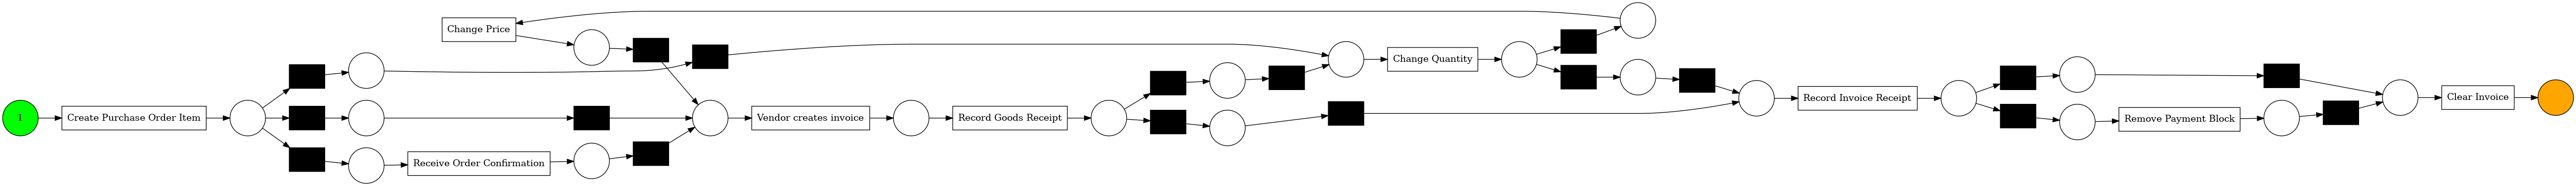

COMPLETION OF SINGLE CLUSTERING


In [4]:
R=VARIANT.copy()
C=[]
I=[]
CS=[]

for i in range(nb_clus) : 
    print("*"*100)
    print("START OF No. {} CLUSTERING".format(i))
    C = []
    I = []
    C, R = clustering(
        C, I, R, 
        log, mcs, tf, w, 
        visual=False, 
        output=False
    )
    CS.append(C)

    print("COMPLETION OF SINGLE CLUSTERING")
print("COMPLETION OF WHOLE CLUSTERING")


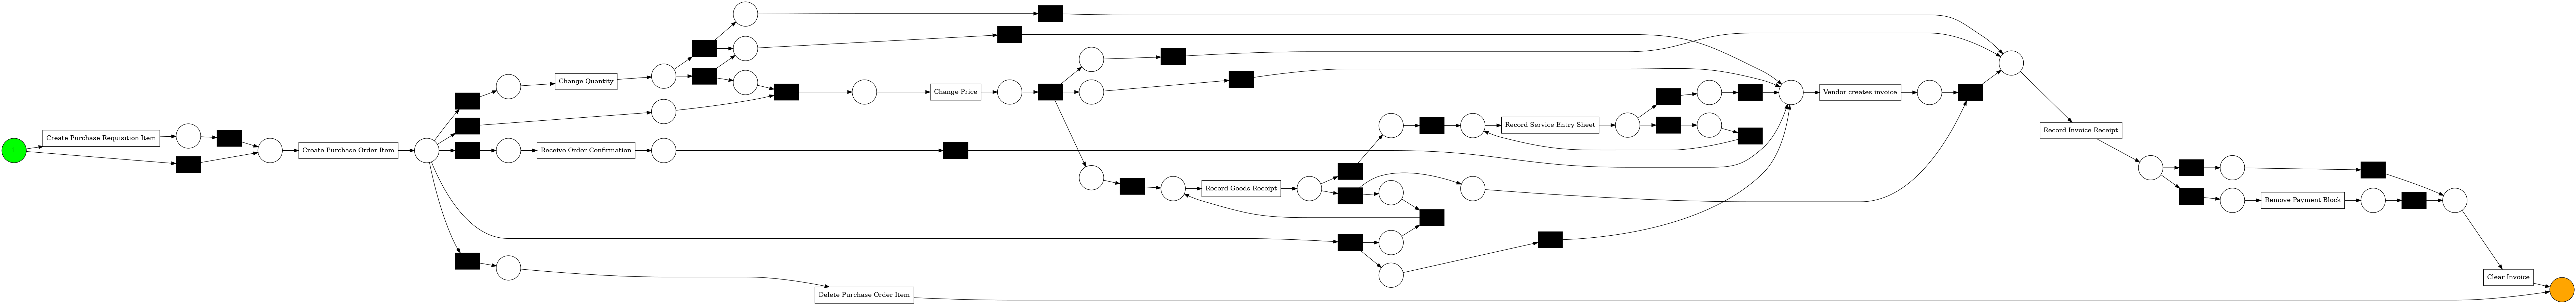

In [18]:
visualization(log, VARIANT, True, False)


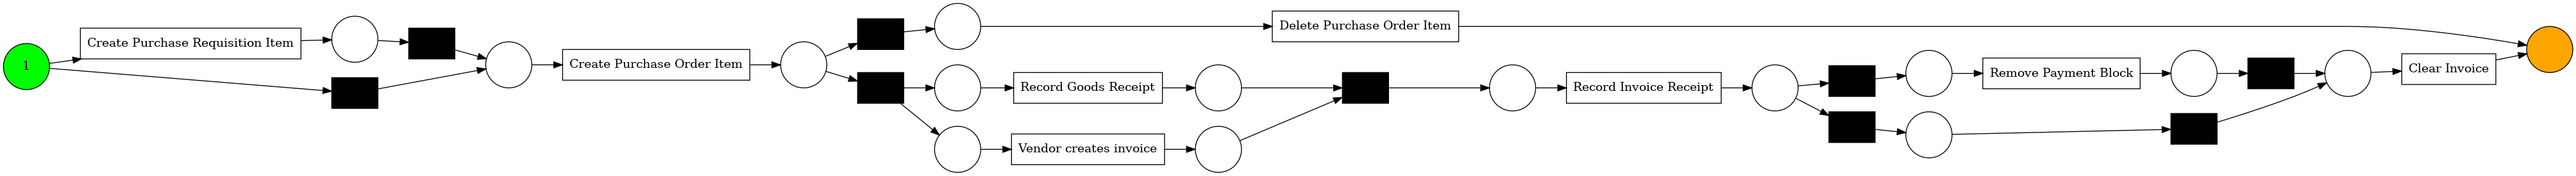

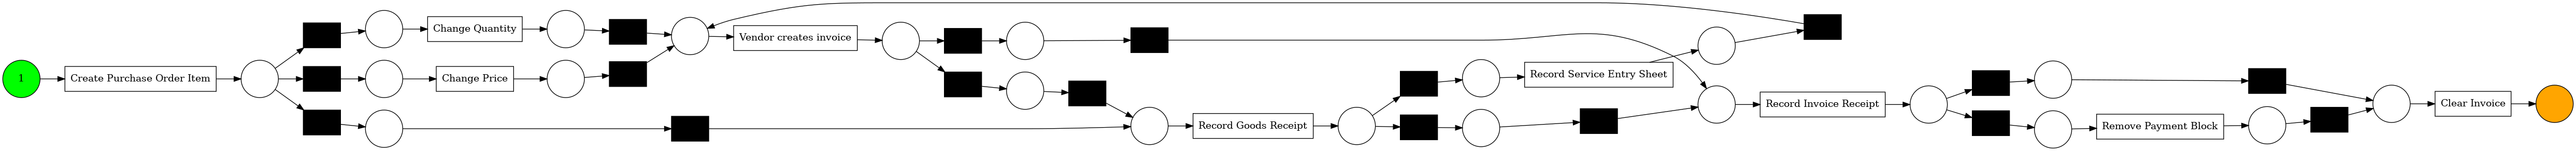

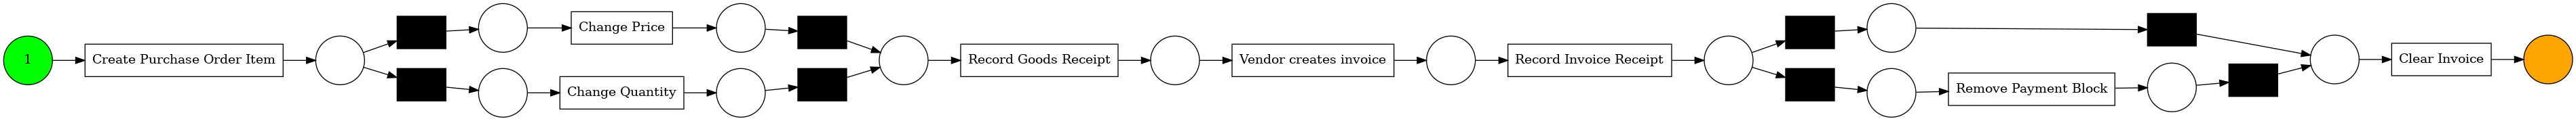

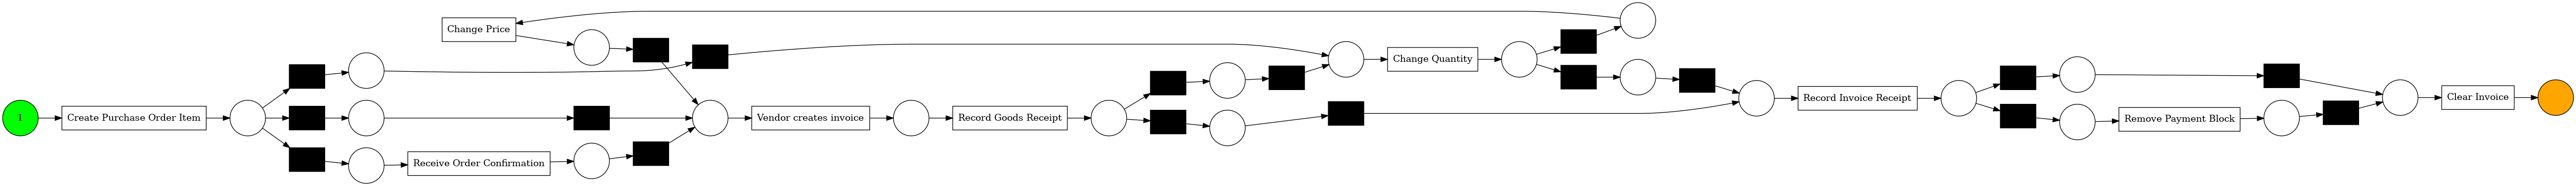

In [19]:
for cs in CS : 
    visualization(log, cs, True, False)


In [7]:
#for f1 score measurement 
# RECALL can be approximated by fitness
# ACCURACY can be approximated by precision
from pm4py.evaluation.precision import evaluator as precision_evaluator
net, im, fm = heuristics_miner.apply(variants_filter.apply(log, C))
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

In [10]:
#for complexity measurement
places = net.places
transitions = net.transitions
arcs = net.arcs